<a href="https://colab.research.google.com/github/bismillahkani/imbalanced-learning/blob/master/Classification_of_imbalanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Over Sampling

In [0]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours
from imblearn.pipeline import Pipeline

In [0]:
def create_data():
  X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
  data = pd.DataFrame(zip(X[:,0],X[:,1],y),columns=['X1','X2','y'])
  return data

def oversample(data,method='SMOTE',strategy='auto'):

  X = data.iloc[:,:-1]
  y = data.iloc[:,-1]

  if method == 'SMOTE':
    sampler = SMOTE(sampling_strategy=strategy)
  elif method == 'ADASYN':
    sampler = ADASYN(sampling_strategy=strategy)
  elif method == 'BorderlineSMOTE':
    sampler = BorderlineSMOTE(sampling_strategy=strategy)
  elif method == 'SVMSMOTE':
    sampler = SVMSMOTE(sampling_strategy=strategy)
  else : 
    print('Invalid Method')

  X, y = sampler.fit_resample(X,y)
  data = pd.DataFrame(zip(X[:,0],X[:,1],y),columns=['X1','X2','y'])
                        
  return data

def oversample_pipeline(data,method='SMOTE',under_strategy='auto',over_strategy='auto'):

  X = data.iloc[:,:-1]
  y = data.iloc[:,-1]

  if method == 'SMOTE':
    over = SMOTE(sampling_strategy=over_strategy)
  elif method == 'ADASYN':
    over = ADASYN(sampling_strategy=over_strategy)
  elif method == 'BorderlineSMOTE':
    over = BorderlineSMOTE(sampling_strategy=over_strategy)
  elif method == 'SVMSMOTE':
    over = SVMSMOTE(sampling_strategy=over_strategy)
  else : 
    print('Invalid Method')

  under = RandomUnderSampler(sampling_strategy=under_strategy)

  steps = [('o', over), ('u', under)]
  pipeline = Pipeline(steps=steps)

  X, y = pipeline.fit_resample(X, y)
  data = pd.DataFrame(zip(X[:,0],X[:,1],y),columns=['X1','X2','y'])

  return data

def undersample(data,method='TomekLinks',strategy='auto'):

  X = data.iloc[:,:-1]
  y = data.iloc[:,-1]

  if method == 'TomekLinks':
    sampler = TomekLinks(sampling_strategy=strategy)
  elif method == 'NearMiss1':
    sampler = NearMiss(version=1,sampling_strategy=strategy)
  elif method == 'NearMiss2':
    sampler = NearMiss(version=2,sampling_strategy=strategy)
  elif method == 'NearMiss3':
    sampler = NearMiss(version=3,sampling_strategy=strategy)
  elif method == 'EditedNearestNeighbours':
    sampler = EditedNearestNeighbours(version=3,sampling_strategy=strategy)
  else : 
    print('Invalid Method')

  X, y = sampler.fit_resample(X,y)
  data = pd.DataFrame(zip(X[:,0],X[:,1],y),columns=['X1','X2','y'])
                        
  return data

def plot_resample(imbalance_data, resample_data):
  fig, ax = plt.subplots(1, 2, figsize= (15,5))

  sns.scatterplot(x='X1', y='X2', hue='y',data=imbalance_data,ax=ax[0])
  ax[0].set_title('Original Data')
  sns.scatterplot(x='X1', y='X2', hue='y',data=resample_data,ax=ax[1])
  ax[1].set_title('Resample Data')

SMOTE

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


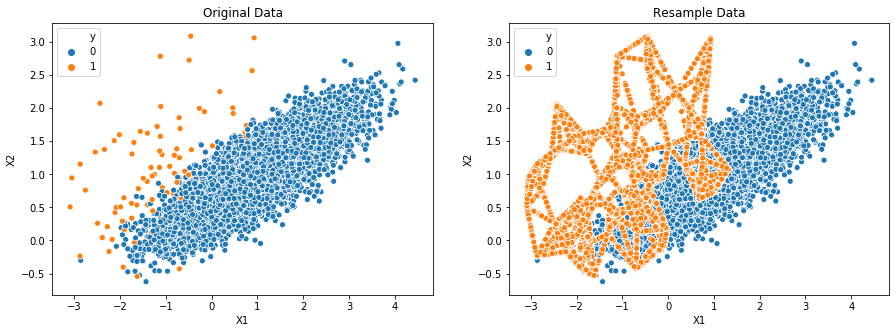

In [4]:
imbalance_data = create_data()
resample_data = oversample(imbalance_data,method='SMOTE',strategy=1.0)
print(Counter(imbalance_data['y']))
print(Counter(resample_data['y']))
plot_resample(imbalance_data, resample_data)

# Under Sampling


Counter({0: 9900, 1: 100})
Counter({0: 126, 1: 100})


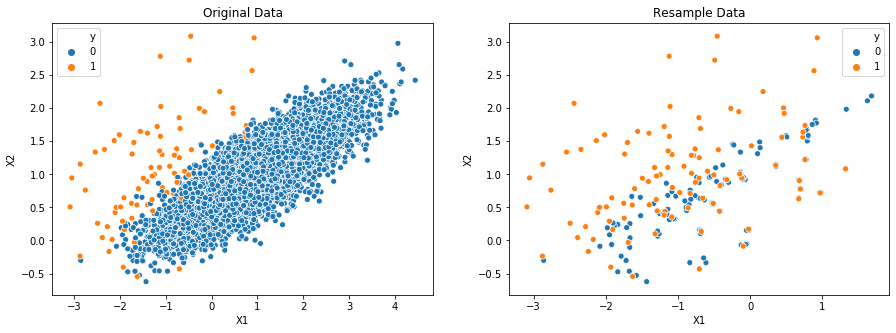

In [5]:
imbalance_data = create_data()
resample_data = undersample(imbalance_data,method='NearMiss3',strategy=0.2)
print(Counter(imbalance_data['y']))
print(Counter(resample_data['y']))
plot_resample(imbalance_data, resample_data)

# Combination - Over + Under

Counter({0: 9900, 1: 100})
Counter({0: 1980, 1: 990})


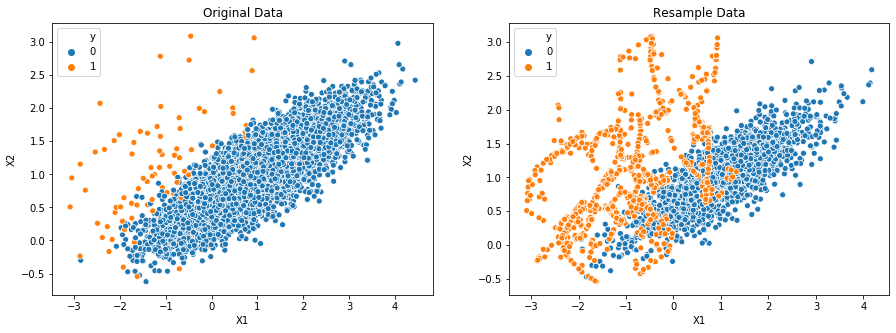

In [6]:
imbalance_data = create_data()
resample_data = oversample_pipeline(imbalance_data,under_strategy=0.5,over_strategy=0.1)
print(Counter(imbalance_data['y']))
print(Counter(resample_data['y']))
plot_resample(imbalance_data, resample_data)

# Classification of wine samples

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import metrics

In [0]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',delimiter=';')
data['target'] = ((data['quality'] <= 3) | (data['quality'] >= 8)).astype(int)
data = data.drop(labels='quality', axis=1)

In [47]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [48]:
print(Counter(data['target']))

Counter({0: 4698, 1: 200})


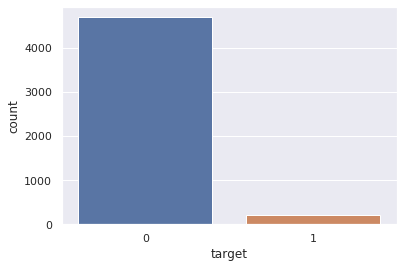

In [49]:
sns.set()
sns.countplot(x='target', data=data)

In [0]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [0]:
def model_resampling_pipeline(X_train, X_test, y_train, y_test, model):
    results = {'ordinary': {},
               'class_weight': {},
               'oversample': {},
               'undersample': {},
               'combination': {}}
    
    # ------ No balancing ------
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, predictions)
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
    fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
    fpr_, tpr_, _ = metrics.roc_curve(y_test.ravel(), predictions.ravel(), pos_label=1)
    auc = metrics.auc(fpr, tpr)
    
    results['ordinary'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                          'fscore': fscore, 'n_occurences': support,
                          'predictions_count': Counter(predictions),
                          'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                          'auc': auc,
                          'fpr':fpr_,
                          'tpr':tpr_}
    
    
    # ------ Class weight ------
    if 'class_weight' in model.get_params().keys():
        model.set_params(class_weight='balanced')
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        fpr_, tpr_, _ = metrics.roc_curve(y_test.ravel(), predictions.ravel(), pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['class_weight'] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                  'fscore': fscore, 'n_occurences': support,
                                  'predictions_count': Counter(predictions),
                                  'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                  'auc': auc,
                                  'fpr':fpr_,
                                  'tpr':tpr_}

    
    # ------------ OVERSAMPLING TECHNIQUES ------------
    print('------ Oversampling methods ------')
    techniques = [RandomOverSampler(),
                  SMOTE(),
                  ADASYN(),
                  BorderlineSMOTE(),
                  SVMSMOTE()]
    
    for sampler in techniques:
        technique = sampler.__class__.__name__
        print(f'Technique: {technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        fpr_, tpr_, _ = metrics.roc_curve(y_test.ravel(), predictions.ravel(), pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['oversample'][technique] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                            'fscore': fscore, 'n_occurences': support,
                                            'predictions_count': Counter(predictions),
                                            'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                            'auc': auc,
                                            'fpr':fpr_,
                                            'tpr':tpr_}

    
    # ------------ UNDERSAMPLING TECHNIQUES ------------
    print('------ Undersampling methods ------')
    techniques = [RandomUnderSampler(),
                  NearMiss(version=1),
                  NearMiss(version=2),
                  NearMiss(version=3,),
                  TomekLinks(),
                  EditedNearestNeighbours()]
    
    for sampler in techniques:
        technique = sampler.__class__.__name__
        if technique == 'NearMiss': technique+=str(sampler.version)
        print(f'Technique: {technique}')
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = sampler.fit_sample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        fpr_, tpr_, _ = metrics.roc_curve(y_test.ravel(), predictions.ravel(), pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['undersample'][technique] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                              'fscore': fscore, 'n_occurences': support,
                                              'predictions_count': Counter(predictions),
                                              'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                              'auc': auc,
                                              'fpr':fpr_,
                                              'tpr':tpr_}

    # ------------ COMBINATION TECHNIQUES ------------
    print('------ Combination methods ------')
    under = RandomUnderSampler(sampling_strategy=0.5)
    techniques = [SMOTE(sampling_strategy=0.1),
                  ADASYN(sampling_strategy=0.1),
                  BorderlineSMOTE(sampling_strategy=0.1),
                  SVMSMOTE(sampling_strategy=0.1)]
    
    for sampler in techniques:
        technique = 'under + ' + sampler.__class__.__name__
        print(f'Technique: {technique}')
        over = sampler
        steps = [('o',over),('u',under)]
        pipeline = Pipeline(steps=steps)
        print(f'Before resampling: {sorted(Counter(y_train).items())}')
        X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)
        print(f'After resampling: {sorted(Counter(y_resampled).items())}')

        model.fit(X_resampled, y_resampled)
        predictions = model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, predictions)
        precision, recall, fscore, support = metrics.precision_recall_fscore_support(y_test, predictions)
        tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()
        fpr, tpr, thresholds = metrics.roc_curve(y_test, predictions, pos_label=1)
        fpr_, tpr_, _ = metrics.roc_curve(y_test.ravel(), predictions.ravel(), pos_label=1)
        auc = metrics.auc(fpr, tpr)

        results['combination'][technique] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 
                                          'fscore': fscore, 'n_occurences': support,
                                          'predictions_count': Counter(predictions),
                                          'tp': tp, 'tn': tn, 'fp': fp, 'fn': fn,
                                          'auc': auc,
                                          'fpr':fpr_,
                                          'tpr':tpr_}
    

    return results

In [0]:
def evaluate_method(results, method, metrics = ['precision', 'recall', 'fscore']):

    fig, ax = plt.subplots(1, 6, sharey=True, figsize=(14, 6))
    
    for i, metric in enumerate(metrics):
        ax[i*2].axhline(results['ordinary'][metric][0], label='No Resampling')
        ax[i*2+1].axhline(results['ordinary'][metric][1], label='No Resampling')
        
        if results['class_weight']:
            ax[i*2].bar(0, results['class_weight'][metric][0], label='Adjust Class Weight')
            ax[i*2+1].bar(0, results['class_weight'][metric][1], label='Adjust Class Weight')
            
        ax[0].legend(loc='upper center', bbox_to_anchor=(8, 1.01),
                     ncol=1, fancybox=True, shadow=True)
        
        for j, (technique, result) in enumerate(results[method].items()):
            ax[i*2].bar(j+1, result[metric][0], label=technique)
            
            ax[i*2+1].bar(j+1, result[metric][1], label=technique)
        
        
        ax[i*2].set_title(f'Low quality wine: \n{metric}')
        ax[i*2+1].set_title(f'High quality wine: \n{metric}')  


In [0]:
def auc_plot(results, metrics = ['precision', 'recall', 'fscore']):
  fig, ax = plt.subplots(3, 1, sharey=True, figsize=(8, 12))

  methods = ['undersample', 'oversample', 'combination']

  for i, method in enumerate(methods):
    ax[i].axhline(results['ordinary']['auc'], label='No Resampling')
    if results['class_weight']:
      ax[i].bar(0, results['class_weight']['auc'], label='Adjust Class Weight')
    for j, (technique, result) in enumerate(results[method].items()):
        ax[i].bar(j+1, result['auc'], label=technique)
    ax[i].set_title(f'AUC Score: {method}')
    ax[i].legend(loc='upper right', bbox_to_anchor=(1.43, 1.01),
                     ncol=1, fancybox=True, shadow=True)
  
  # ax[0].legend(loc='upper center', bbox_to_anchor=(1, 1.01),
  #                    ncol=1, fancybox=True, shadow=True)
  # ax[1].legend(loc='center', bbox_to_anchor=(1, 1.01),
  #                    ncol=1, fancybox=True, shadow=True)
  # ax[2].legend(loc='lower center', bbox_to_anchor=(1, 1.01),
  #                    ncol=1, fancybox=True, shadow=True)

# Logistics Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [17]:
model_lr = LogisticRegression()
results_lr = model_resampling_pipeline(X_train, X_test, y_train, y_test, model_lr)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 3758), (1, 3758)]
Technique: SMOTE
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 3758), (1, 3758)]
Technique: ADASYN
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 3758), (1, 3733)]
Technique: BorderlineSMOTE
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 3758), (1, 3758)]
Technique: SVMSMOTE
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 3758), (1, 3758)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 160), (1, 160)]
Technique: NearMiss1
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 160), (1, 160)]
Technique: NearMiss2
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 160), (1, 160)]
Technique: NearMiss3
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 160), (1, 1

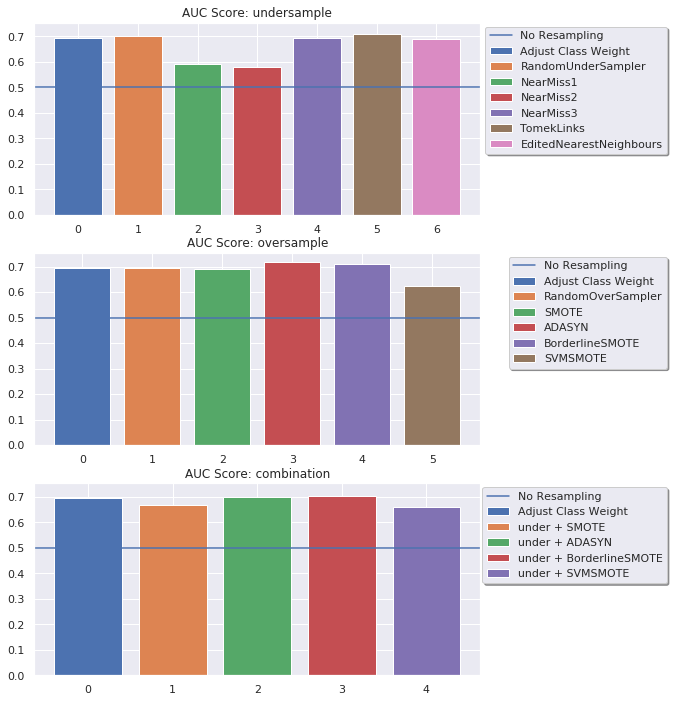

In [18]:
auc_plot(results_lr)

# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
model_rf = RandomForestClassifier()
results_rf = model_resampling_pipeline(X_train, X_test, y_train, y_test, model_rf)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 3758), (1, 3758)]
Technique: SMOTE
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 3758), (1, 3758)]
Technique: ADASYN
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 3758), (1, 3733)]
Technique: BorderlineSMOTE
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 3758), (1, 3758)]
Technique: SVMSMOTE
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 3758), (1, 3758)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 160), (1, 160)]
Technique: NearMiss1
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 160), (1, 160)]
Technique: NearMiss2
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 160), (1, 160)]
Technique: NearMiss3
Before resampling: [(0, 3758), (1, 160)]
After resampling: [(0, 160), (1, 1

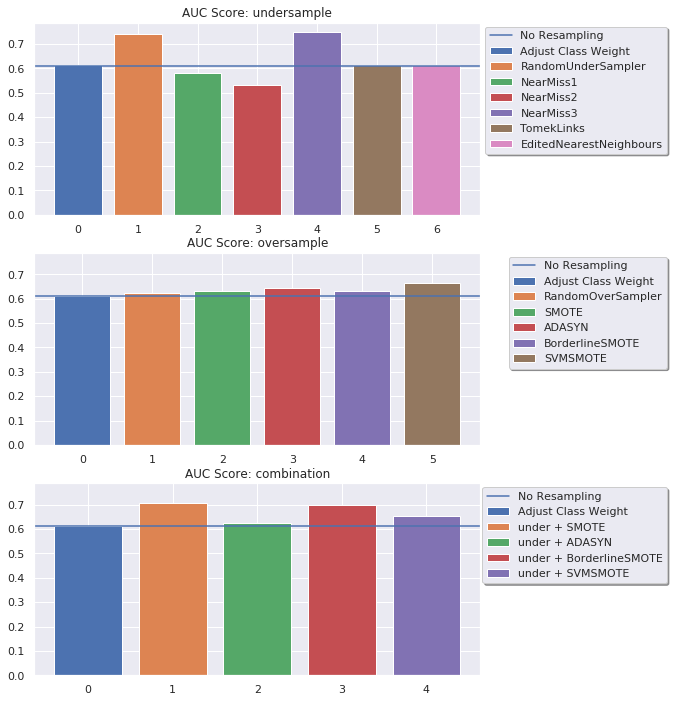

In [21]:
auc_plot(results_rf)

# Credi Card Fraud Detection

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
data = pd.read_csv('/content/drive/My Drive/creditcard.csv')

In [61]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [62]:
print(Counter(data['Class']))

Counter({0: 284315, 1: 492})


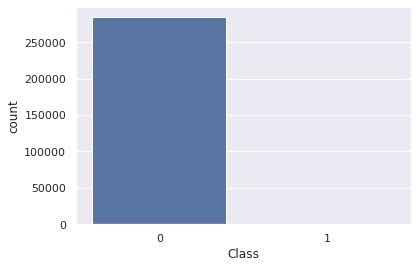

In [63]:
sns.set()
sns.countplot(x='Class', data=data)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Time'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [0]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
model_lr = LogisticRegression()
results_lr = model_resampling_pipeline(X_train, X_test, y_train, y_test, model_lr)

------ Oversampling methods ------
Technique: RandomOverSampler
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 227451), (1, 227451)]
Technique: SMOTE
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 227451), (1, 227451)]
Technique: ADASYN
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 227451), (1, 227459)]
Technique: BorderlineSMOTE
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 227451), (1, 227451)]
Technique: SVMSMOTE
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 227451), (1, 227451)]
------ Undersampling methods ------
Technique: RandomUnderSampler
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 394), (1, 394)]
Technique: NearMiss1
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 394), (1, 394)]
Technique: NearMiss2
Before resampling: [(0, 227451), (1, 394)]
After resampling: [(0, 394), (1, 394)]
Technique: NearMiss3
Before resampling: [(0, 227451), (1, 39

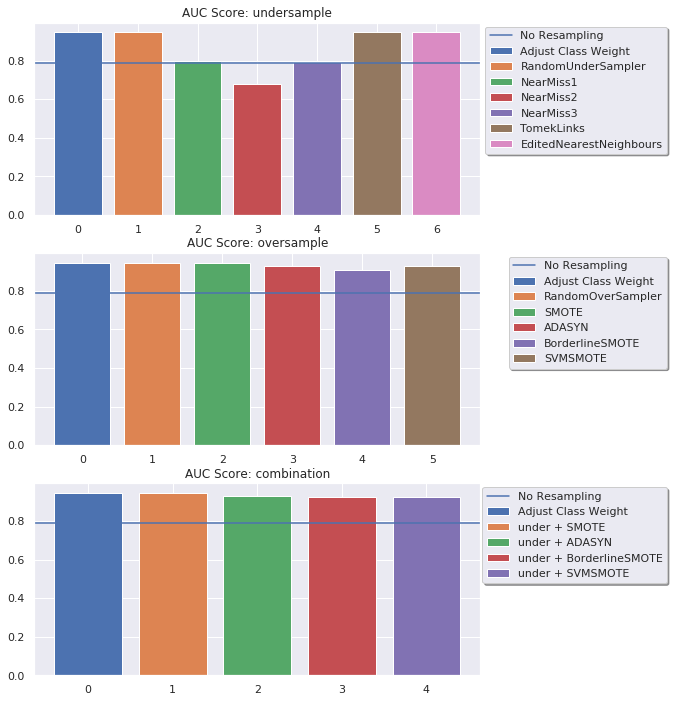

In [67]:
auc_plot(results_lr)